In [1]:
%pylab inline
from pycheops.models import FactorModel, EclipseModel, ThermalPhaseModel
from lmfit import report_fit

Populating the interactive namespace from numpy and matplotlib


In [2]:
T_0 = 0.5
P = 2.0
a_th = 0.012
b_th = -0.003
c_th = 0.0027
D = 0.04
W = 0.06
b = 0.1
L = 0.001

In [3]:
m = ThermalPhaseModel(prefix="T")*EclipseModel()*FactorModel()
pars = m.make_params(T_0=T_0, 
                     Ta_th=a_th, Tb_th=b_th, Tc_th=c_th,
                     D=D, W=W, b=b, L=L)
pars['P'].set(value=P, vary=False)
pars['TT_0'].set(expr='T_0')
pars['TP'].set(expr='P')
pars

name,value,initial value,min,max,vary,expression
TT_0,0.50000000,None,-inf,inf,False,T_0
TP,2.00000000,None,1.0000e-15,inf,False,P
Ta_th,0.01200000,None,-inf,inf,True,
Tb_th,-0.00300000,None,-inf,inf,True,
Tc_th,0.00270000,None,0.00000000,inf,True,
T_0,0.50000000,None,-inf,inf,True,
P,2.00000000,None,1.0000e-15,inf,False,
D,0.04000000,None,0.00000000,0.25000000,True,
W,0.06000000,None,0.00000000,0.30000000,True,
b,0.10000000,None,0.00000000,1.00000000,True,


(0.5, 2.499000000000002)

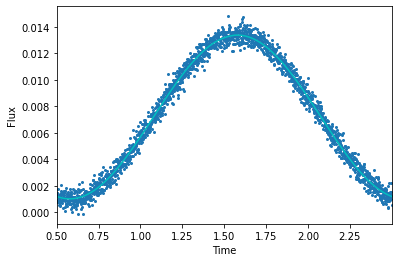

In [8]:
t = np.arange(T_0,T_0 + P, 0.001)
yerr = np.full_like(t, 450e-6)
flux_true = m.eval(params=pars, t=t)
flux = flux_true + normal(0.0, yerr, size=len(t))
fig,ax=subplots()
ax.scatter(t, flux,s=4)
ax.plot(t, flux_true,'c')
ax.set_xlabel('Time')
ax.set_ylabel('Flux')
ax.set_xlim(min(t),max(t))
#ax.set_ylim(0,1.5*pars['_F'].value)


In [9]:
print('Max flux from model = {:0.4f}, F = {:0.4f}'.format(max(flux_true),pars['TFmax'].value))
print('Phase of maximum flux from model = {:0.4f}, ph_max = {:0.4f}'
      .format((t[argmax(flux_true)]-T_0)/P,pars['Tph_max'].value % 1))
print('Peak-to-trough amplitude from model = {:0.3f}, A = {:0.3f}'
      .format(max(flux_true)-min(flux_true),pars['TA'].value))

Max flux from model = 0.0134, F = 0.0134
Phase of maximum flux from model = 0.5390, ph_max = 0.5390
Peak-to-trough amplitude from model = 0.012, A = 0.012


In [10]:
result = m.fit(flux, pars, t=t, weights=1/yerr)
report_fit(result)

[[Fit Statistics]]
    # fitting method   = leastsq
    # function evals   = 95
    # data points      = 2000
    # variables        = 9
    chi-square         = 1968.27129
    reduced chi-square = 0.98858428
    Akaike info crit   = -13.9830796
    Bayesian info crit = 36.4250425
[[Variables]]
    TT_0:        0.50289531 +/- 666.001091 (132433.35%) == 'T_0'
    TP:          2.00000000 +/- 0.00000000 (0.00%) == 'P'
    Ta_th:       0.01208726 +/- 1634.39824 (13521658.67%) (init = 0.012)
    Tb_th:      -0.00285568 +/- 386.286027 (13526923.12%) (init = -0.003)
    Tc_th:       0.00259625 +/- 350.973459 (13518498.85%) (init = 0.0027)
    T_0:         0.50289531 +/- 666.001089 (132433.35%) (init = 0.5)
    P:           2 (fixed)
    D:           0.09675286 +/- 603911.870 (624179841.08%) (init = 0.04)
    W:           0.28101557 +/- 33498.3762 (11920469.71%) (init = 0.06)
    b:           0.98249764 +/- 704311.789 (71685850.62%) (init = 0.1)
    L:           6.5672e-04 +/- 2157.83322 (3285

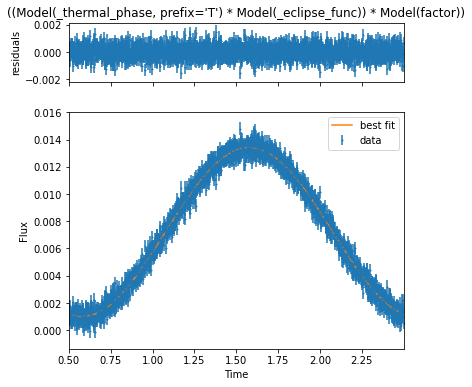

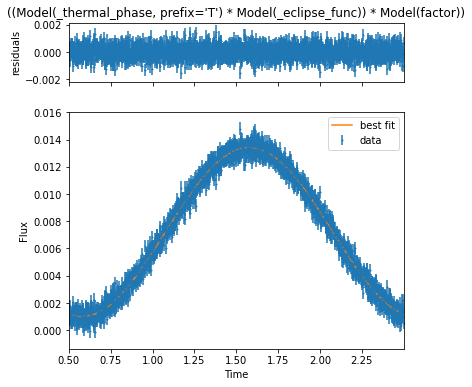

In [11]:
result.plot(xlabel='Time',ylabel='Flux',data_kws={'ms':1},ax_fit_kws={'xlim':[min(t),max(t)]})

&copy; Pierre Maxted, Keele University, 2019